In [24]:
# Install libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv(r"C:\Users\admin\Desktop\dtintern\dataset\Customers.csv")
products = pd.read_csv(r"C:\Users\admin\Desktop\dtintern\dataset\Products.csv")
transactions = pd.read_csv(r"C:\Users\admin\Desktop\dtintern\dataset\Transactions.csv")




In [26]:
# Preview the datasets
print("Customers Dataset")
print(customers.head())
print("\nProducts Dataset")
print(products.head())
print("\nTransactions Dataset")
print(transactions.head())

Customers Dataset
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      

In [27]:
# Check for missing values
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print("Duplicates in Transactions:", transactions.duplicated().sum())

# Drop duplicates (if any)
transactions.drop_duplicates(inplace=True)



Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Duplicates in Transactions: 0


In [28]:
# Merge transactions with customers
merged_data = pd.merge(transactions, customers, on="CustomerID")

# Merge the above with products
merged_data = pd.merge(merged_data, products, on="ProductID")

# Preview the merged dataset
print("Merged Dataset")
print(merged_data.head())


Merged Dataset
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bl

In [29]:
# Convert date columns to datetime
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Extract year and month from TransactionDate
merged_data['Year'] = merged_data['TransactionDate'].dt.year
merged_data['Month'] = merged_data['TransactionDate'].dt.month


C:\Users\admin\AppData\Local\Temp\ipykernel_8736\4277856464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='cool')


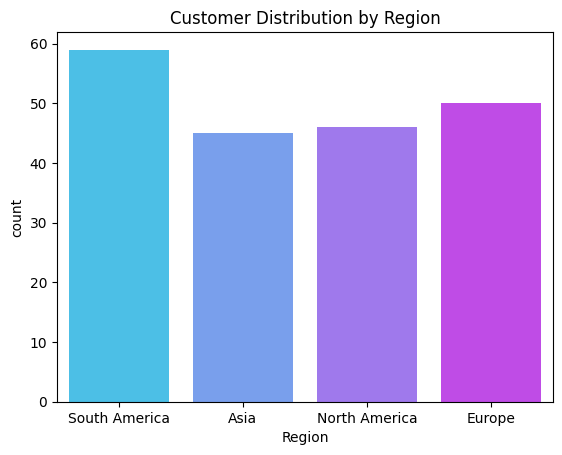

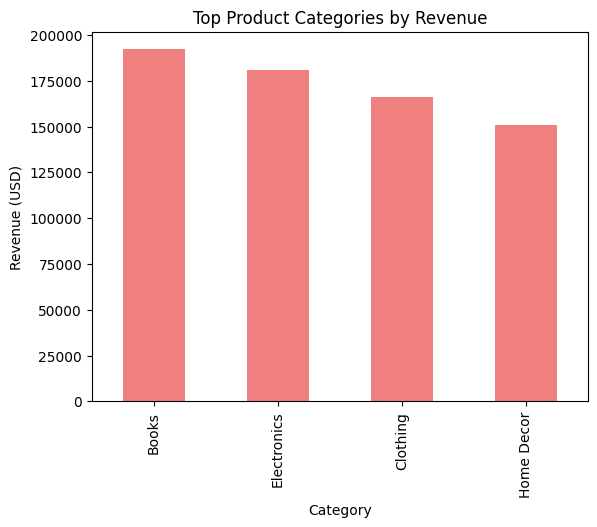

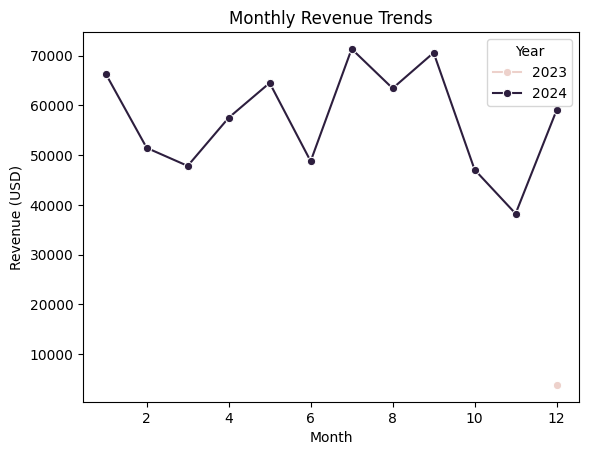

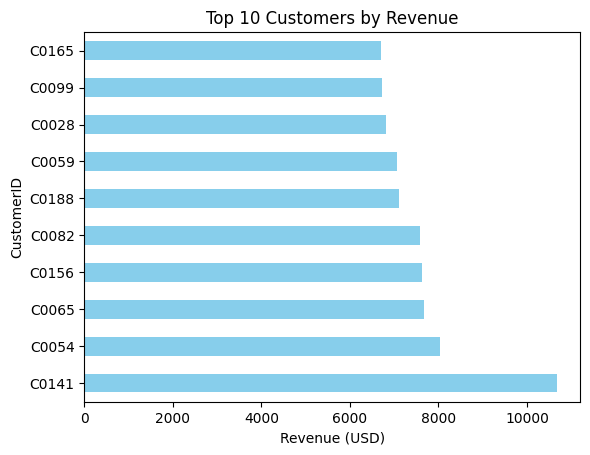

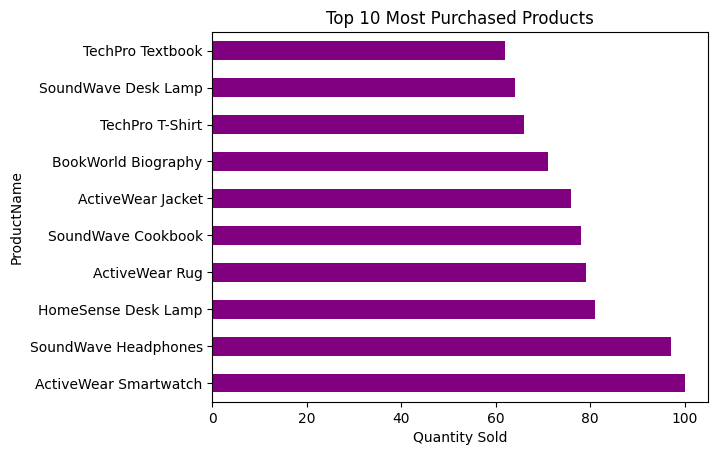

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Distribution by Region
sns.countplot(data=customers, x='Region', palette='cool')
plt.title("Customer Distribution by Region")
plt.show()

# Top Product Categories by Revenue
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='lightcoral')
plt.title("Top Product Categories by Revenue")
plt.ylabel("Revenue (USD)")
plt.show()

# Monthly Revenue Trend
monthly_revenue = merged_data.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()
sns.lineplot(data=monthly_revenue, x='Month', y='TotalValue', hue='Year', marker='o')
plt.title("Monthly Revenue Trends")
plt.ylabel("Revenue (USD)")
plt.show()

# Top Customers by Revenue
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers.plot(kind='barh', color='skyblue')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue (USD)")
plt.show()

# Most Purchased Products
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(10)
popular_products.plot(kind='barh', color='purple')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Quantity Sold")
plt.show()
